In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

Load the dataset

In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape , y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
x_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train = y_train.reshape(50000)

In [7]:
y_train[0]

6

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def show_img(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

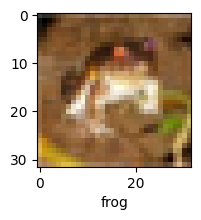

In [10]:
show_img(x_train,y_train,0)

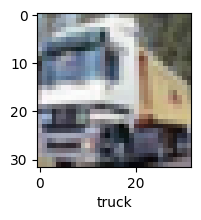

In [11]:
show_img(x_train,y_train,1)

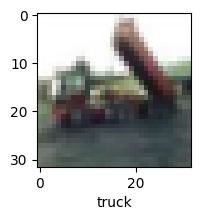

In [12]:
show_img(x_train,y_train,2)

Normalizing the data


In [13]:
x_train = x_train /255
x_test = x_test /255

Build a ANN

In [14]:
#from keras.api._v2.keras import activations
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten
model = Sequential([

    Flatten(input_shape=(32,32,3)),

    Dense(3072, activation = "relu"),
    Dense(2000, activation = "relu"),
    Dense(10, activation = "softmax")
])

In [15]:
from tensorflow import keras
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(0.001),
    metrics = "accuracy"
)


In [16]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 15s 6ms/step - loss: 1.8993 - accuracy: 0.3247
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6923 - accuracy: 0.3908
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6230 - accuracy: 0.4178
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5790 - accuracy: 0.4328
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5513 - accuracy: 0.4454
Epoch 6/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5236 - accuracy: 0.4522
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5002 - accuracy: 0.4605
Epoch 8/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4823 - accuracy: 0.4674
Epoch 9/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4681 - accuracy: 0.4743
Epoch 10/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.44

In [17]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5216 - accuracy: 0.4757


[1.521620273590088, 0.4756999909877777]

In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.60      0.55      1000
           1       0.47      0.72      0.57      1000
           2       0.42      0.25      0.31      1000
           3       0.33      0.33      0.33      1000
           4       0.43      0.37      0.40      1000
           5       0.41      0.35      0.38      1000
           6       0.52      0.52      0.52      1000
           7       0.50      0.54      0.52      1000
           8       0.61      0.58      0.59      1000
           9       0.52      0.49      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.47      0.48      0.47     10000
weighted avg       0.47      0.48      0.47     10000



ANN is performing very bad hear
now let's train CNN

In [19]:
from keras.api._v2.keras import activations
cnn = models.Sequential([
    #CNN Layers
    layers.Conv2D(filters=32 , kernel_size = (3,3) , activation = "relu" , input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size = (3,3) , activation = "relu" , input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    #ANN
    layers.Flatten(),
    layers.Dense(32 , activation="relu"),
    layers.Dense(64 , activation="relu"),
    layers.Dense(10 , activation="softmax")

])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 15s 5ms/step - loss: 1.6548 - accuracy: 0.3785
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3516 - accuracy: 0.4977
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2324 - accuracy: 0.5457
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1554 - accuracy: 0.5773
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0846 - accuracy: 0.6055
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0203 - accuracy: 0.6317
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9694 - accuracy: 0.6524
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9363 - accuracy: 0.6645
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9068 - accuracy: 0.6751
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.88

In [22]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9802 - accuracy: 0.6591


[0.9802440404891968, 0.6590999960899353]

In [23]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.76      0.71      1000
           1       0.72      0.81      0.76      1000
           2       0.52      0.50      0.51      1000
           3       0.44      0.43      0.43      1000
           4       0.60      0.61      0.60      1000
           5       0.57      0.56      0.57      1000
           6       0.71      0.77      0.74      1000
           7       0.75      0.72      0.73      1000
           8       0.82      0.75      0.78      1000
           9       0.81      0.68      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



You can clearlly see that CNN works much better then ANN for image data

In [24]:
y_pred_classes[:5]

[3, 8, 8, 0, 6]

In [25]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

Now testing the model for any random image

In [26]:
from PIL import Image
import numpy as np

def load_and_resize_image(image_path, target_size=(32, 32)):
    # Step 1: Load the image using Pillow
    img = Image.open(image_path)

    # Step 2: Resize the image to the target size
    img = img.resize(target_size, Image.ANTIALIAS)

    # Step 3: Convert to numpy array
    img_array = np.array(img)

    # Step 4 (Optional): Normalize the pixel values to [0, 1]
    img_array = img_array.astype('float32') / 255.0

    return img_array

In [27]:
a = load_and_resize_image("/content/f.jpeg" , target_size=(32, 32))

In [28]:
a

array([[[0.9254902 , 0.94509804, 0.81960785],
        [0.7372549 , 0.8352941 , 0.61960787],
        [0.5019608 , 0.7411765 , 0.4392157 ],
        ...,
        [0.02745098, 0.01176471, 0.04313726],
        [0.23921569, 0.16862746, 0.19215687],
        [0.38431373, 0.25490198, 0.27058825]],

       [[0.7019608 , 0.84313726, 0.6745098 ],
        [0.59607846, 0.75686276, 0.5254902 ],
        [0.49803922, 0.73333335, 0.3764706 ],
        ...,
        [0.01960784, 0.01568628, 0.03921569],
        [0.23137255, 0.17254902, 0.1882353 ],
        [0.37254903, 0.27058825, 0.29411766]],

       [[0.65882355, 0.7882353 , 0.627451  ],
        [0.627451  , 0.73333335, 0.6431373 ],
        [0.5372549 , 0.7254902 , 0.46666667],
        ...,
        [0.02745098, 0.03921569, 0.05490196],
        [0.22352941, 0.18039216, 0.20392157],
        [0.3137255 , 0.22745098, 0.23921569]],

       ...,

       [[0.69803923, 0.7490196 , 0.5529412 ],
        [0.59607846, 0.6509804 , 0.5176471 ],
        [0.5529412 , 0

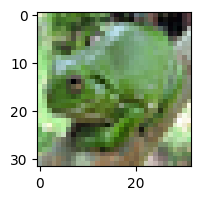

In [29]:
plt.figure(figsize=(15,2))
plt.imshow(a)

In [30]:
a = a/255

In [31]:
a

array([[[3.6293734e-03, 3.7062669e-03, 3.2141483e-03],
        [2.8911957e-03, 3.2756634e-03, 2.4298348e-03],
        [1.9684739e-03, 2.9065744e-03, 1.7224145e-03],
        ...,
        [1.0765091e-04, 4.6136101e-05, 1.6916571e-04],
        [9.3810074e-04, 6.6128414e-04, 7.5355632e-04],
        [1.5071126e-03, 9.9961564e-04, 1.0611304e-03]],

       [[2.7527874e-03, 3.3064208e-03, 2.6451366e-03],
        [2.3375626e-03, 2.9680892e-03, 2.0607461e-03],
        [1.9530950e-03, 2.8758170e-03, 1.4763552e-03],
        ...,
        [7.6893506e-05, 6.1514809e-05, 1.5378701e-04],
        [9.0734335e-04, 6.7666284e-04, 7.3817762e-04],
        [1.4609765e-03, 1.0611304e-03, 1.1534026e-03]],

       [[2.5836218e-03, 3.0911188e-03, 2.4605922e-03],
        [2.4605922e-03, 2.8758170e-03, 2.5221070e-03],
        [2.1068822e-03, 2.8450596e-03, 1.8300654e-03],
        ...,
        [1.0765091e-04, 1.5378701e-04, 2.1530181e-04],
        [8.7658595e-04, 7.0742023e-04, 7.9969241e-04],
        [1.2302961e-03

In [32]:
a.shape

(32, 32, 3)

In [33]:
a = np.expand_dims(a, axis=0)
a.shape

(1, 32, 32, 3)

In [34]:
cla = cnn.predict(x=a)

1/1 [==============================] - 0s 89ms/step


In [35]:
cla = np.argmax(cla)

In [36]:
classes[cla]

'cat'

Writteing function to do this all task

In [37]:
from PIL import Image
import numpy as np

def load_and_resize_image_ready_for_model_input(image_path, target_size=(32, 32)):
    # Step 1: Load the image using Pillow
    img = Image.open(image_path)

    # Step 2: Resize the image to the target size
    img = img.resize(target_size, Image.ANTIALIAS)

    # Step 3: Convert to numpy array
    img_array = np.array(img)

    # Step 4 (Optional): Normalize the pixel values to [0, 1]
    #img_array = img_array.astype('float32') / 255.0

    #Showing image
    plt.figure(figsize=(15,2))
    plt.imshow(img_array)

    #normalizing image
    img_array = img_array/255

    #Expand dimension
    img_array = np.expand_dims(img_array, axis=0)


    return img_array

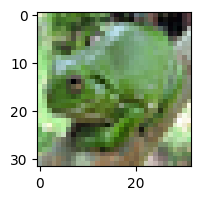

In [38]:
img = load_and_resize_image_ready_for_model_input("/content/f.jpeg" , target_size=(32,32))

In [39]:
def label(model , img):
  lab = model.predict(img)
  lab = np.argmax(lab)
  return classes[lab]

In [41]:
print(label(cnn,img))

1/1 [==============================] - 0s 40ms/step
frog
